## Boat Solved with DP

In [1]:
from package_RL_JBM import DynamicProgrammingSolver, PolicyPlotter_DP, GeosearchEnv, BoatEnvSimulator, GridWorldEnv, PolicyPlotter_MC, MonteCarloSolver

In [2]:
import gymnasium as gym
from gym import spaces
import numpy as np
import pygame

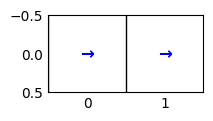

In [3]:
# Initialize the environments
boat_env = BoatEnvSimulator(east_wind_prob=0.7, west_wind_prob=0.3)


# Create solver instances
boat_solver = DynamicProgrammingSolver(boat_env, gamma=0.99, theta=0.01, use_value_iteration=True)

# Solve each environment
boat_policy, _ = boat_solver.solve()


# Plotting the optimal policies
# Adjust action symbols for the boat environment
boat_action_symbols = {0: '←', 1: '→'}
boat_plotter = PolicyPlotter_DP((1, 2), boat_policy, action_symbols=boat_action_symbols)
boat_plotter.plot()

## Gridworld Solved with DP

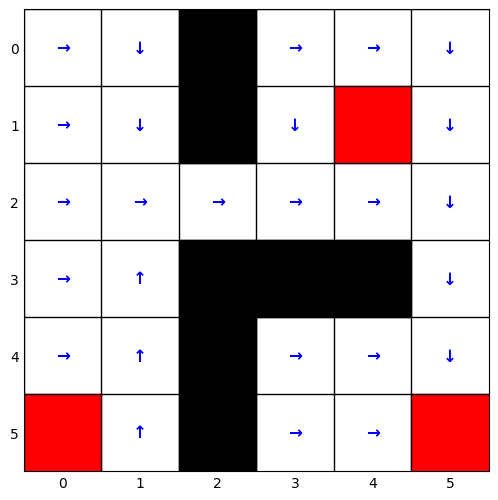

In [4]:
# Step 1: Initialize the Environment
env = GridWorldEnv(gamma=0.25)

# Step 2: Create the Solver
solver = DynamicProgrammingSolver(env, gamma=0.99, theta=0.01, use_value_iteration=True)

# Step 3: Solve the Environment
policy, value = solver.solve()

# Step 4: Visualize the policy
# Convert terminal states to a list of coordinates for the plotter
terminal_coords = list(env.terminal_states.keys())
# Pass walls directly as they are already in the correct format
plotter = PolicyPlotter_DP(env.grid_size, policy, walls=list(env.walls), terminal_states=terminal_coords)
plotter.plot()

## Gesearch solved with DP

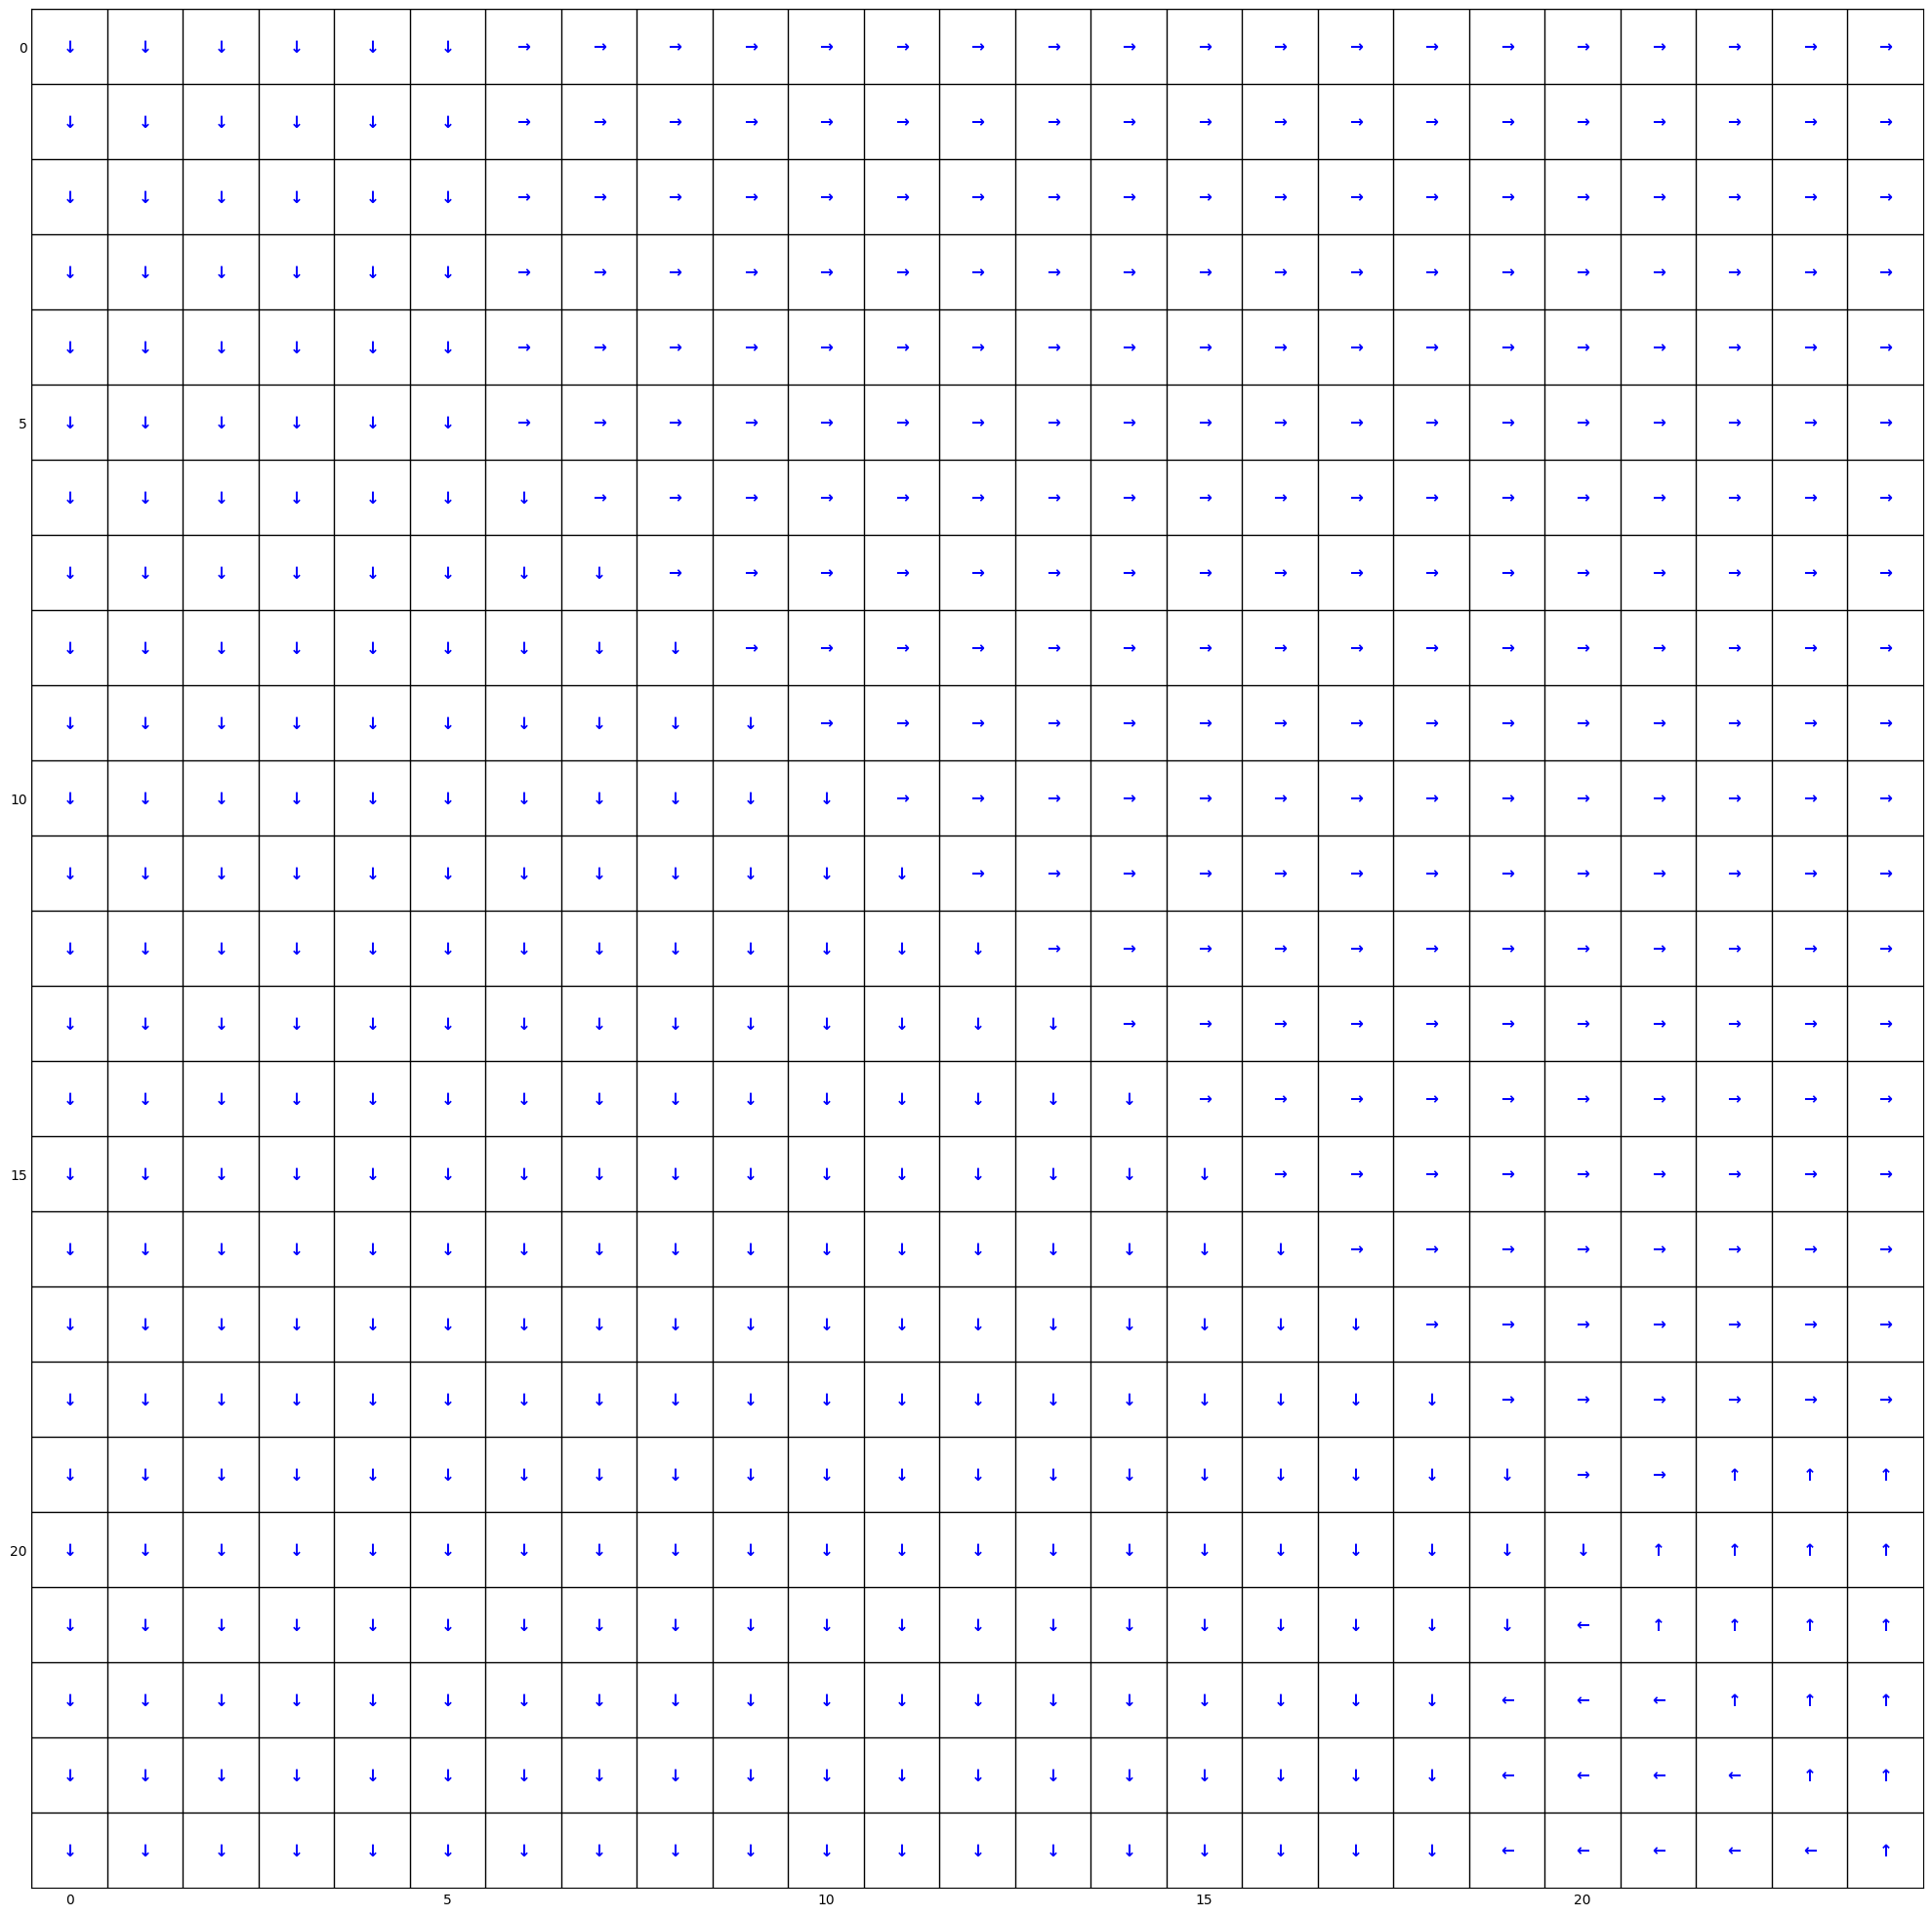

In [5]:
env = GeosearchEnv(A=0.75)
solver = DynamicProgrammingSolver(env, gamma=0.99, theta=0.01, use_value_iteration=True)
policy, value = solver.solve()

# Plot the policy
action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}  # For up, down, left, right

# Plot the policy using PolicyPlotter
plotter = PolicyPlotter_DP(grid_size=(env.grid_size, env.grid_size), 
                        policy=policy, 
                        walls=[],  # No walls in Geosearch
                        terminal_states=[],  # Add terminal states if defined
                        action_symbols=action_symbols)

plotter.plot()

## Boat Solved with MC

Policy after 0 episodes: {0: 1, 1: 1}
Policy after 100 episodes: {0: 1, 1: 1}
Policy after 200 episodes: {0: 0, 1: 0}
Policy after 300 episodes: {0: 1, 1: 1}
Policy after 400 episodes: {0: 0, 1: 1}


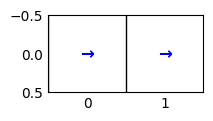

In [11]:
# Initialize environment
env = BoatEnvSimulator()

# Initialize the MonteCarloSolver with desired parameters
mc_solver = MonteCarloSolver(env, gamma=0.99, epsilon=0.1, exploring_starts=False, episodes=500)

# Run the Monte Carlo solver
policy = mc_solver.run()

# Plot the optimal policy using PolicyPlotter
boat_action_symbols = {0: '←', 1: '→'}
plotter = PolicyPlotter_MC((1, 2), policy, action_symbols=boat_action_symbols)
plotter.plot()


## Gridworld Solved with MC

Policy after 0 episodes: {0: 3, 1: 3, 2: 1, 3: 1, 4: 1, 5: 3, 6: 2, 7: 0, 8: 2, 9: 0, 10: 1, 11: 3, 12: 3, 13: 0, 14: 2, 15: 1, 16: 2, 17: 0, 18: 3, 19: 0, 20: 2, 21: 1, 22: 2, 23: 1, 24: 0, 25: 1, 26: 1, 27: 1, 28: 1, 29: 2, 30: 1, 31: 1, 32: 0, 33: 0, 34: 1, 35: 1}
Policy after 100 episodes: {0: 0, 1: 1, 2: 2, 3: 3, 4: 1, 5: 2, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 2, 12: 2, 13: 2, 14: 1, 15: 0, 16: 0, 17: 2, 18: 1, 19: 0, 20: 1, 21: 1, 22: 1, 23: 2, 24: 2, 25: 0, 26: 1, 27: 3, 28: 1, 29: 2, 30: 0, 31: 3, 32: 1, 33: 1, 34: 0, 35: 1}
Policy after 200 episodes: {0: 0, 1: 1, 2: 2, 3: 1, 4: 1, 5: 2, 6: 0, 7: 1, 8: 0, 9: 0, 10: 1, 11: 2, 12: 3, 13: 1, 14: 1, 15: 0, 16: 3, 17: 2, 18: 2, 19: 0, 20: 0, 21: 3, 22: 1, 23: 2, 24: 1, 25: 0, 26: 2, 27: 1, 28: 1, 29: 2, 30: 0, 31: 3, 32: 1, 33: 1, 34: 0, 35: 1}
Policy after 300 episodes: {0: 0, 1: 1, 2: 0, 3: 1, 4: 1, 5: 2, 6: 1, 7: 2, 8: 2, 9: 0, 10: 1, 11: 2, 12: 3, 13: 1, 14: 1, 15: 0, 16: 3, 17: 2, 18: 2, 19: 0, 20: 0, 21: 3, 22: 1, 23: 2, 24: 1,

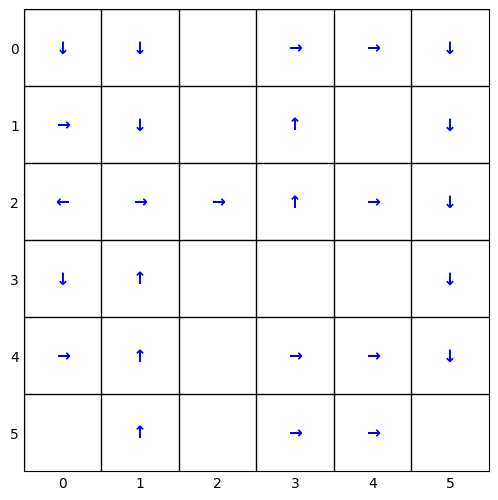

In [9]:
env = GridWorldEnv()
mc_solver = MonteCarloSolver(env, gamma=0.99, epsilon=0.1, exploring_starts=True, episodes=1000)
policy = mc_solver.run()
print("Final policy for GridWorldEnv:", policy)

plotter = PolicyPlotter_MC(env.grid_size, policy, walls=env.walls, terminal_states=env.terminal_states)
plotter.plot()

## Geosearch Solved with MC

Policy after 0 episodes: {0: 3, 1: 0, 2: 2, 3: 3, 4: 3, 5: 1, 6: 1, 7: 0, 8: 0, 9: 0, 10: 2, 11: 2, 12: 2, 13: 3, 14: 1, 15: 2, 16: 3, 17: 3, 18: 3, 19: 2, 20: 3, 21: 3, 22: 2, 23: 2, 24: 3, 25: 1, 26: 0, 27: 2, 28: 3, 29: 1, 30: 1, 31: 3, 32: 1, 33: 0, 34: 3, 35: 1, 36: 1, 37: 3, 38: 2, 39: 0, 40: 2, 41: 2, 42: 3, 43: 3, 44: 0, 45: 2, 46: 0, 47: 0, 48: 3, 49: 2, 50: 2, 51: 3, 52: 0, 53: 3, 54: 1, 55: 1, 56: 2, 57: 0, 58: 2, 59: 2, 60: 1, 61: 0, 62: 3, 63: 3, 64: 2, 65: 3, 66: 1, 67: 1, 68: 2, 69: 2, 70: 3, 71: 0, 72: 2, 73: 1, 74: 0, 75: 2, 76: 2, 77: 3, 78: 3, 79: 0, 80: 1, 81: 0, 82: 3, 83: 1, 84: 0, 85: 2, 86: 1, 87: 0, 88: 3, 89: 2, 90: 3, 91: 1, 92: 0, 93: 3, 94: 1, 95: 3, 96: 3, 97: 2, 98: 2, 99: 0, 100: 3, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 3, 111: 0, 112: 3, 113: 2, 114: 1, 115: 3, 116: 0, 117: 0, 118: 3, 119: 1, 120: 3, 121: 0, 122: 0, 123: 2, 124: 3, 125: 3, 126: 1, 127: 2, 128: 2, 129: 2, 130: 0, 131: 2, 132: 2, 133: 0, 134: 0, 135:

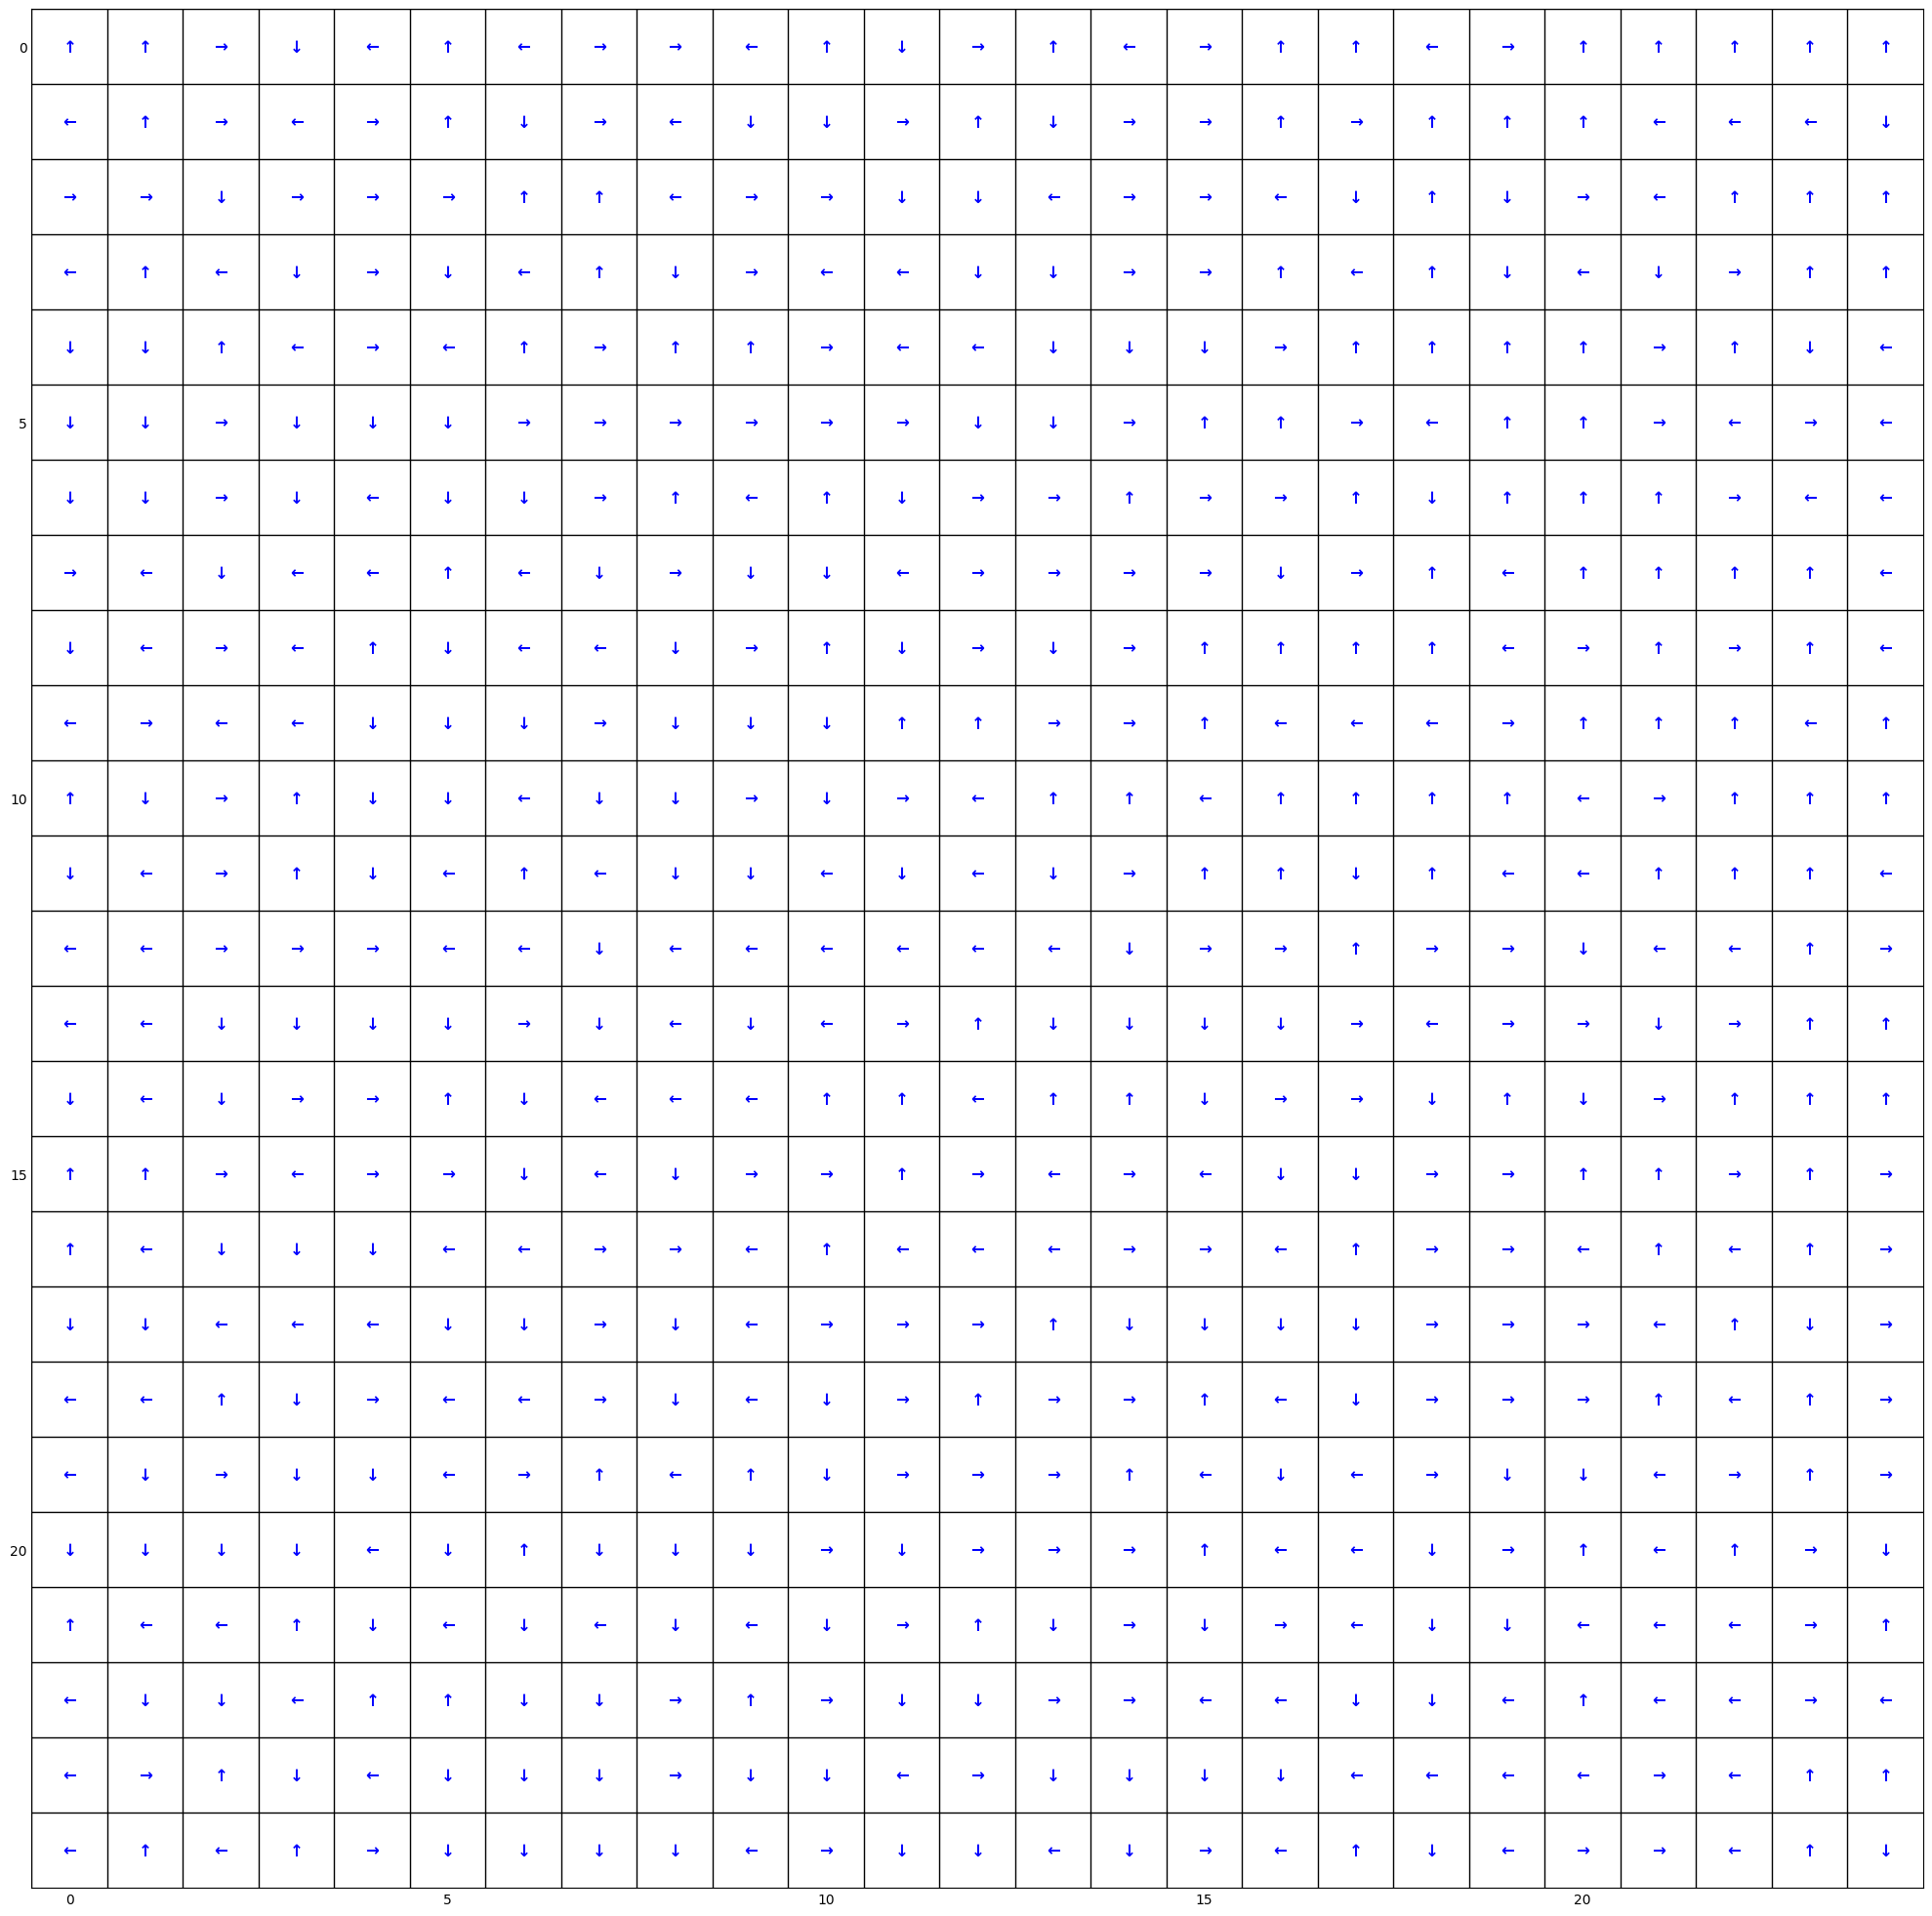

In [10]:
# Initialize the Geosearch environment
env = GeosearchEnv()

# Initialize the MonteCarloSolver with the parameters needed for Geosearch
mc_solver = MonteCarloSolver(env, gamma=0.99, epsilon=0.1, exploring_starts=True, episodes=1000)

# Run the Monte Carlo solver to compute the policy
policy = mc_solver.run()

# Print the final policy for inspection
print("Final policy for GeosearchEnv:")
for state, action in policy.items():
    print(f"State {state}: Action {action}")

# Plot the optimal policy using PolicyPlotter
action_symbols = {0: '↑', 1: '↓', 2: '←', 3: '→'}
plotter = PolicyPlotter_MC(grid_size=(env.grid_size, env.grid_size), 
                        policy=policy, 
                        walls=[],  # No walls in Geosearch
                        terminal_states=[],  # Add terminal states if defined
                        action_symbols=action_symbols)

plotter.plot()